# WeatherPy

---

In [2]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy.stats import linregress

# import openweathermap api key
from api_keys import weather_api_key

# import citipy
from citipy import citipy

### Generate  Cities List Using the `citipy` Library

In [3]:
# empty list for holding lat and lon combinations
lat_lons = []

# empty list for holding city names
cities = []

# latitude and longitude ranges
lat_range = (-90, 90)
lon_range = (-180, 180)

# generate random set of lat and lon combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lons = zip(lats, lons)

# identify nearest city for each lat lon combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # if city is unique, add to cities list
    if city not in cities:
        cities.append(city)

# city count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Relationship Between Weather Variables and Latitude

In [4]:
# set api base url
url = 'https://api.openweathermap.org/data/2.5/weather'

# temperature conversion
units = 'metric'

# define empty list to fetch weather data for each city
city_data = []

# print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# counters
record_count = 1
set_count = 1

# loop through cities in list to fetch weather data
for i, city in enumerate(cities):

    # group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # endpoint url
    city_encoded = urllib.parse.quote(city)
    city_url = f'{url}?appid={weather_api_key}&units={units}&q={city_encoded}'
    
    # log url, record, set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # add 1 to record count
    record_count += 1

    # run api request for each city
    try:
        # parse json and retrieve data
        city_weather = requests.get(city_url).json()

        # parse latitude, longitude, max temp, humidity, cloudiness, wind speed, country, date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # append city information into city_data
        city_data.append({'City' : city,
                          'Lat' : city_lat,
                          'Lon' : city_lon,
                          'Max Temp' : city_max_temp,
                          'Humidity' : city_humidity,
                          'Cloudiness' : city_clouds,
                          'Wind Speed' : city_wind,
                          'Country' : city_country,
                          'Date' : city_date})
        
    # skip city if error is experienced    
    except:
        print('City not found. Skipping...')
 
# indicate data loading completion
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quellon
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | toga village
City not found. Skipping...
Processing Record 5 of Set 1 | florina
Processing Record 6 of Set 1 | tamiyah
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | nadym
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | wanganui
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | usinsk
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | chegdomyn
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | shakawe
Processing Record 21 of Set 1 | bengkulu
Process

In [5]:
# convert cities weather data into pandas dataframe
city_data_df = pd.DataFrame(city_data)

# show record count
city_data_df.count()

City          588
Lat           588
Lon           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,quellon,-43.1167,-73.6167,7.45,81,100,4.81,CL,1715236461
1,san patricio,28.0170,-97.5169,27.31,93,100,2.94,US,1715236462
2,petropavlovsk-kamchatsky,53.0452,158.6483,10.33,67,75,11.00,RU,1715236224
3,florina,40.7820,21.4098,15.15,71,100,1.92,GR,1715236464
4,tamiyah,29.4764,30.9612,27.68,17,1,1.39,EG,1715236464


In [7]:
# export city_data_df into csv
city_data_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [8]:
# read saved data
city_data_df = pd.read_csv('output_data/cities.csv', index_col='City_ID')

# display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quellon,-43.1167,-73.6167,7.45,81,100,4.81,CL,1715236461
1,san patricio,28.0170,-97.5169,27.31,93,100,2.94,US,1715236462
2,petropavlovsk-kamchatsky,53.0452,158.6483,10.33,67,75,11.00,RU,1715236224
3,florina,40.7820,21.4098,15.15,71,100,1.92,GR,1715236464
4,tamiyah,29.4764,30.9612,27.68,17,1,1.39,EG,1715236464


### Scatter Plots

#### Latitude Vs. Temperature

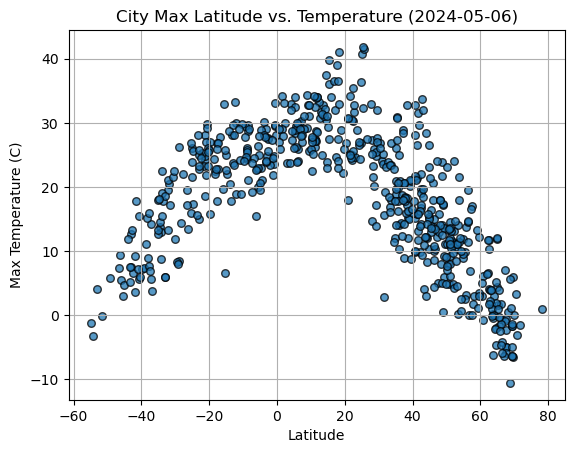

In [9]:
# scatter plot for latitude vs temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=30, c='tab:blue', edgecolors='black', alpha=0.75)

# graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-05-06)')
plt.grid()

# save figure
plt.savefig('output_data/Fig1.png')

# display plot
plt.show()

#### Latitude Vs. Humidity

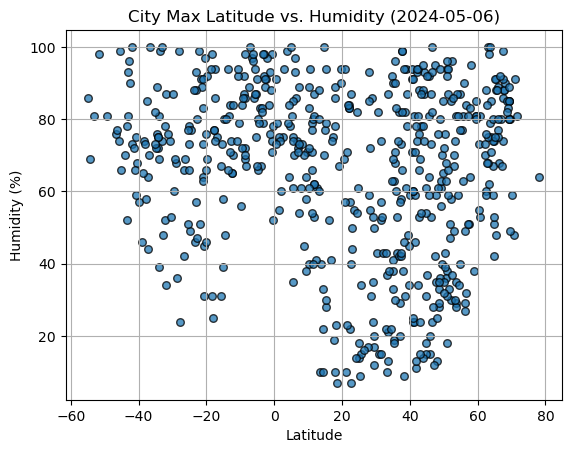

In [10]:
# scatter plot for latitude vs humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=30, c='tab:blue', edgecolors='black', alpha=0.75)

# graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2024-05-06)')
plt.grid()

# save figure
plt.savefig('output_data/Fig2.png')

# display plot
plt.show()

#### Latitude Vs. Cloudiness

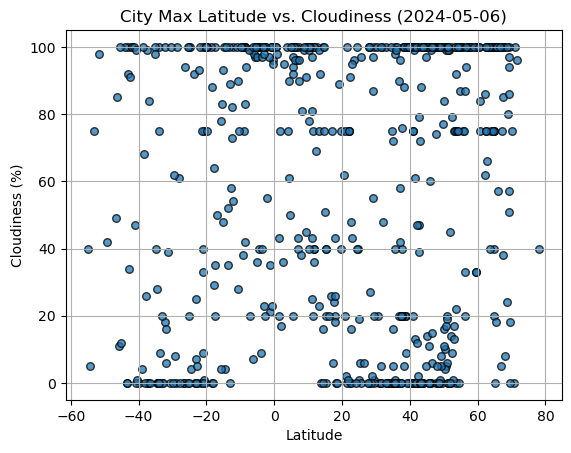

In [11]:
# scatter plot for latitude vs cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=30, c='tab:blue', edgecolors='black', alpha=0.75)

# graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2024-05-06)')
plt.grid()

# save figure
plt.savefig('output_data/Fig3.png')

# display plot
plt.show()

#### Latitude Vs. Wind Speed

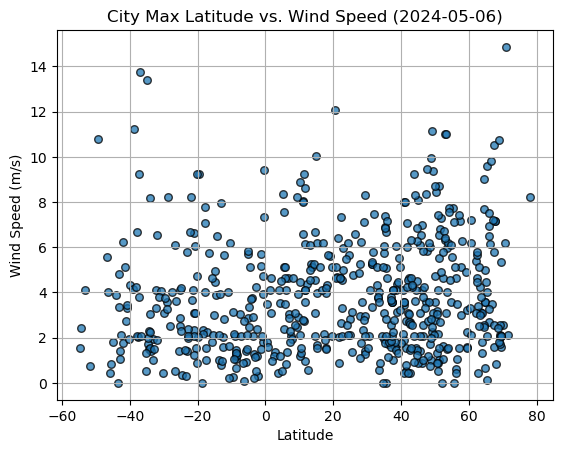

In [12]:
# scatter plot for latitude vs wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], 
            marker='o', s=30, c='tab:blue', edgecolors='black', alpha=0.75)

# graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2024-05-06)')
plt.grid()

# save figure
plt.savefig('output_data/Fig4.png')

# display plot
plt.show()

---

## Linear Regression for Each Relationship

In [13]:
# define function to create linear regression plot
def linregress_def(x, y, xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y, marker='o', color='tab:blue', alpha=1)
    plt.plot(x,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")

    print(f'The r value is: {rvalue}')
    plt.show()

In [14]:
# create dataframe with northern hemisphere data (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san patricio,28.0170,-97.5169,27.31,93,100,2.94,US,1715236462
2,petropavlovsk-kamchatsky,53.0452,158.6483,10.33,67,75,11.00,RU,1715236224
3,florina,40.7820,21.4098,15.15,71,100,1.92,GR,1715236464
4,tamiyah,29.4764,30.9612,27.68,17,1,1.39,EG,1715236464
6,nadym,65.5333,72.5167,-1.69,91,100,9.60,RU,1715236466


In [15]:
# create dataframe with southern hemisphere data (latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quellon,-43.1167,-73.6167,7.45,81,100,4.81,CL,1715236461
5,edinburgh of the seven seas,-37.0676,-12.3116,14.28,70,84,13.77,SH,1715236465
7,blackmans bay,-43.0167,147.3167,12.63,93,92,1.05,AU,1715236467
8,adamstown,-25.0660,-130.1015,21.62,78,100,2.52,PN,1715236467
9,port-aux-francais,-49.3500,70.2167,5.86,81,42,10.78,TF,1715236468


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8535270981371914


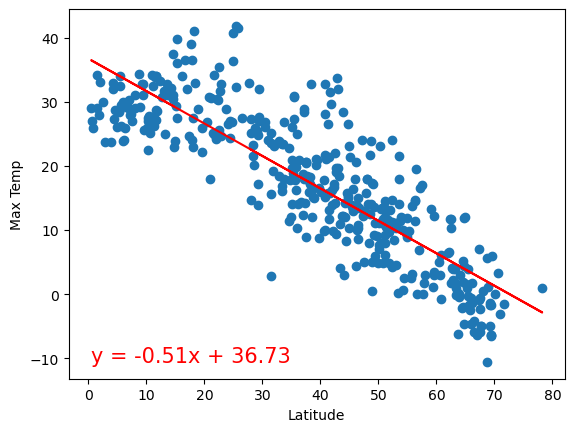

In [16]:
# northern hemisphere max temp vs lat
linregress_def(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r value is: 0.7970283070140443


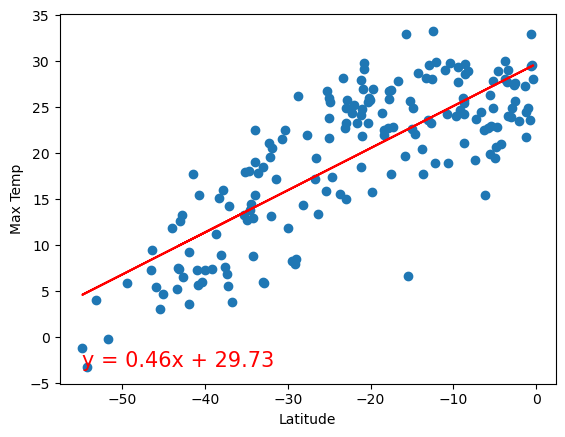

In [17]:
# southern hemisphere max temp vs lat
linregress_def(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** Overall, there is a strong linear relationship between temperature and latitude in both northern and southern hemispheres. It appears that the closer the latitude is to 0, the higher the maximum temperature is. As a result, the further that the latitude is from 0 (in either the north or south direction), the lower the maximum temperature is. This may suggest that cities closer to the equator tend to be hotter than those further from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.10003696575116597


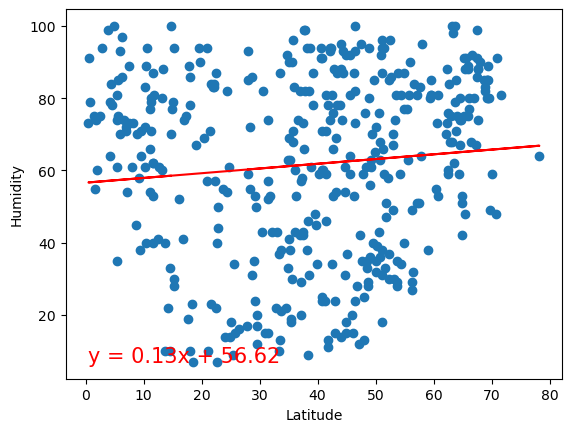

In [18]:
# northern hemisphere humidity vs lat
linregress_def(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r value is: 0.1678816572372887


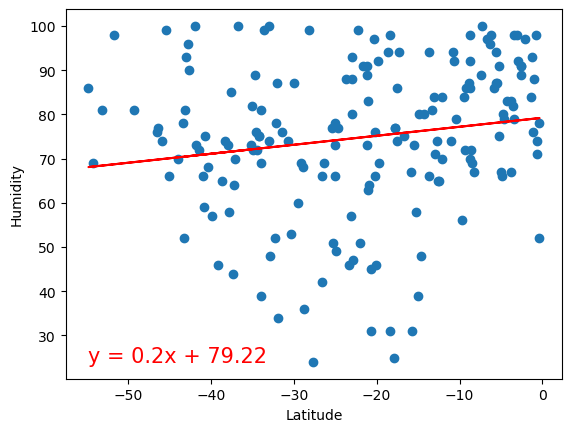

In [19]:
# southern hemisphere humidity vs lat
linregress_def(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity') 

**Discussion about the linear relationship:** Overall, there is a weak linear relationship between temperature and latitude in both northern and southern hemispheres. The points on both regression plots appear to distributed without a strong pattern. This may suggest that latitude does not have a strong influence on the relative humidity of a city. When analyzing the cties of the points, it appears that there are more locations with humidity > 50 than locations with humidity < 50.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.07907300598327302


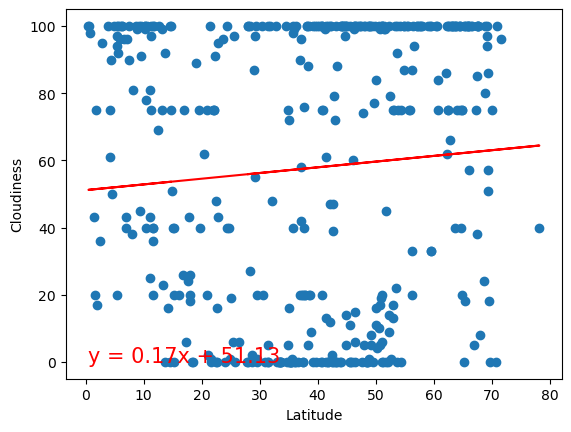

In [20]:
# northern hemisphere cloudiness vs lat
linregress_def(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness') 

The r value is: 0.2846990649642013


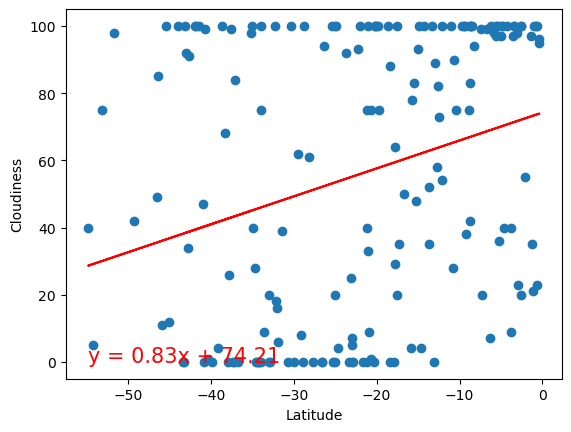

In [21]:
# southern hemisphere cloudiness vs lat
linregress_def(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness') 

**Discussion about the linear relationship:** Overall, there is a weak linear relationship between cloudiness and latitude in both northern and southern hemispheres. The points on both regression plots appear to distributed without a strong pattern. This may suggest that latitude does not have a strong influence on the relative cloudiness of a city. When analyzing the locations of the points, it appears that cloudiness of cities can range from no cloudiness, full cloudiness, or cloudiness in between.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.08160737531896385


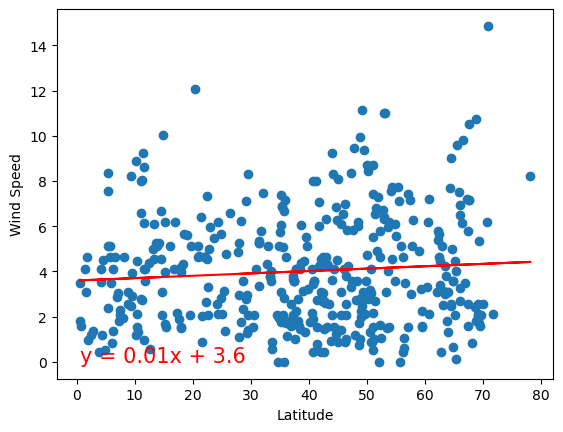

In [22]:
# northern hemisphere wind speed vs lat
linregress_def(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed') 

The r value is: -0.11685225444132431


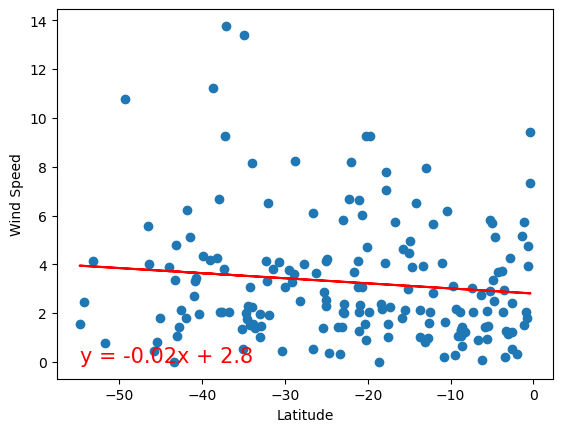

In [23]:
# southern hemisphere wind speed vs lat
linregress_def(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed') 

**Discussion about the linear relationship:** Overall, there is a weak linear relationship between wind speed and latitude in both northern and southern hemispheres. The points on both regression plots appear to distributed without a strong pattern. This may suggest that latitude does not have a strong influence on the relative wind speed of a city. When analyzing the location of the points, it appears that the majority of cities have a windspeed of under 10.